In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import seaborn as sns
import datetime as dt
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [75]:
df = pd.read_csv('data/master_data_with_sequel_director.csv')

In [76]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [77]:
df['returnb'] = df['domestic_gross'] / df['budget']
df.sort_values('budget',ascending=False).head(50)

,Unnamed: 0,movie_title,domestic_distributor,budget,domestic_opening_sales,earliest_release,rating,runtime_minutes,genres,summary_sales,...,Gal Gadot,Angelina Jolie,Jason Statham,Thomas Tull,Tommy Lee Jones,James Newton Howard,bankable_count,domestic_gross,year,returnb
1,1,Avengers: Endgame,Walt Disney Studios Motion Pictures,356000000,357115007,2019-04-24,PG-13,181.0,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","[['Domestic', 858373000], ['International', 19...",...,0,0,0,0,0,0,3,858373000,2019,2.411160
7,7,Star Wars: Episode VIII,Walt Disney Studios Motion Pictures,317000000,220009584,2017-12-13,PG-13,152.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 620181382], ['International', 71...",...,0,0,0,0,0,0,0,620181382,2017,1.956408
71,72,Pirates of the Caribbean: At World's End,Walt Disney Studios Motion Pictures,300000000,114732820,2007-05-22,PG-13,169.0,"['Action', 'Adventure', 'Fantasy']","[['Domestic', 309420425], ['International', 65...",...,0,0,0,0,0,0,1,309420425,2007,1.031401
4,4,Avengers: Infinity War,Walt Disney Studios Motion Pictures,300000000,257698183,2018-04-25,PG-13,149.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 678815482], ['International', 13...",...,0,0,0,0,0,0,3,678815482,2018,2.262718
130,135,Justice League,Warner Bros.,300000000,93842239,2017-10-17,PG-13,120.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 229024295], ['International', 42...",...,1,0,0,0,0,0,2,229024295,2017,0.763414
158,165,Solo: A Star Wars Story,Walt Disney Studios Motion Pictures,275000000,84420489,2018-05-23,PG-13,135.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 213767512], ['International', 17...",...,0,0,0,0,0,0,0,213767512,2018,0.777336
11,11,Star Wars: Episode IX,Walt Disney Studios Motion Pictures,275000000,177383864,2019-12-18,PG-13,141.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[['Domestic', 515202542], ['International', 55...",...,0,0,0,0,0,0,0,515202542,2019,1.873464
181,193,Superman Returns,Warner Bros.,270000000,52535096,2006-06-28,PG-13,154.0,"['Action', 'Sci-Fi']","[['Domestic', 200081192], ['International', 19...",...,0,0,0,0,0,0,0,200081192,2006,0.741041
179,188,Tangled,Walt Disney Studios Motion Pictures,260000000,48767052,2010-11-24,PG,100.0,"['Adventure', 'Animation', 'Comedy', 'Family',...","[['Domestic', 200821936], ['International', 39...",...,0,0,0,0,0,0,0,200821936,2010,0.772392
50,51,Spider-Man 3,Sony Pictures Entertainment (SPE),258000000,151116516,2007-05-01,PG-13,139.0,"['Action', 'Adventure', 'Sci-Fi']","[['Domestic', 336530303], ['International', 55...",...,0,0,0,0,0,0,0,336530303,2007,1.304381


In [78]:
df.sort_values('budget').groupby('Horror').describe()

Unnamed: 0                                                              \
            count        mean         std   min     25%    50%     75%    max   
Horror                                                                          
0           686.0  367.243440  213.328698   0.0  182.25  369.5  553.75  742.0   
1            37.0  508.216216  195.875121  59.0  360.00  549.0  685.00  739.0   

       budget                ...    year         returnb              \
        count          mean  ...     75%     max   count        mean   
Horror                       ...                                       
0       686.0  1.009933e+08  ...  2015.0  2020.0   686.0    2.533172   
1        37.0  3.871392e+07  ...  2017.0  2019.0    37.0  202.439801   

                                                                           
                std       min       25%       50%        75%          max  
Horror                                                                     
0          4.365821  0.415359  1.198442  1.775354   2.702282    93.383953  
1       1181.463239  0.706840  2.228579  5.677805  11.060257  7194.587333  

[2 rows x 664 columns]

In [79]:
df1 = df[['budget','is_sequel','month','top50_d','year','bankable_count','runtime_minutes','domestic_gross']]

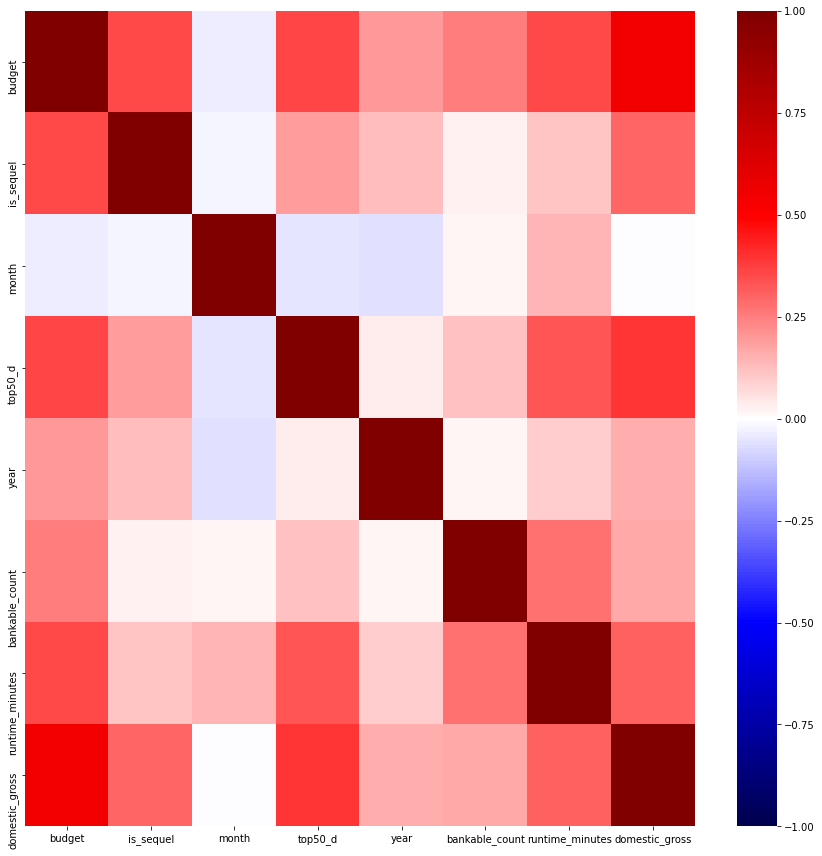

In [80]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

<ipython-input-81-0640107250d6>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);


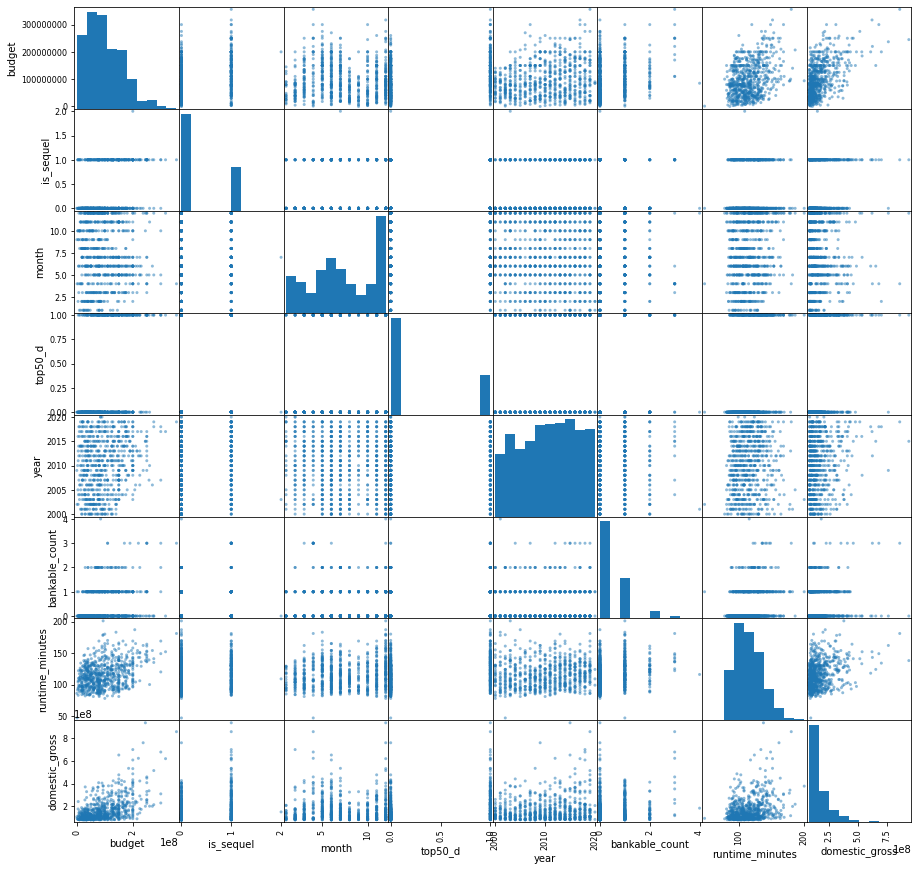

In [81]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);

Text(0.5, 1.0, 'Budget versus domestic gross top movies from 2000 to 2020')

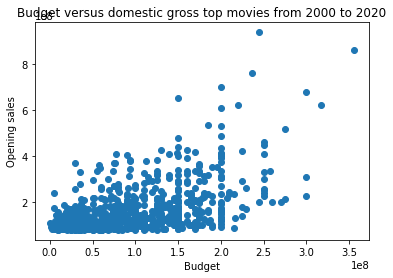

In [82]:
#fig, ax = plt.subplots(figsize=(9, 7))

budget_x = df['budget']
sales_y = df['domestic_gross']

plt.scatter(budget_x, sales_y)
plt.xlabel('Budget')
plt.ylabel('Opening sales')
plt.title('Budget versus domestic gross top movies from 2000 to 2020')

In [161]:
x = df[['budget','is_sequel','rating','top50_d','year','runtime_minutes','month','Action','Adventure','Animation','Comedy','Drama','Horror','Mystery','Romance']]


y = df['domestic_gross']

x_tr, x_test, y_tr, y_test = train_test_split(x, y,test_size=.2, random_state=5)

In [162]:
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=.25, random_state=10)

In [85]:
x_budget_train = x_train[['budget']]
x_budget_val = x_val[['budget']]
x_budget_test = x_test[['budget']]

In [86]:
b_lr = LinearRegression()

b_lr.fit(x_budget_train, y_train)

b_lr.score(x_budget_val, y_val) #R2

y_pred = b_lr.predict(x_budget_val)
np.sqrt(mean_squared_error(y_val, y_pred))

97328915.5094579

In [87]:
b_lr.score(x_budget_val, y_val) #R2

0.35766365683765244

In [88]:
print('Feature coefficient results: \n')
for feature, coef in zip(x_budget_train.columns, b_lr.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.90


In [89]:
x_budget_train['b2'] = x_budget_train['budget']**2
x_budget_val['b2'] = x_budget_val['budget']**2

<ipython-input-89-154c5e5295c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_budget_train['b2'] = x_budget_train['budget']**2
<ipython-input-89-154c5e5295c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_budget_val['b2'] = x_budget_val['budget']**2


In [90]:
x_budget_train.head()

,budget,b2
128,90000000,8100000000000000
254,80000000,6400000000000000
394,50000000,2500000000000000
532,34000000,1156000000000000
78,125000000,15625000000000000


In [91]:
b_lr = LinearRegression()

b_lr.fit(x_budget_train, y_train)

b_lr.score(x_budget_val, y_val) #R2

y_pred = b_lr.predict(x_budget_val)
np.sqrt(mean_squared_error(y_val, y_pred))

91263547.88702409

In [92]:
b_lr.score(x_budget_val, y_val) #R2

0.43522765516896855

In [171]:
print('Feature coefficient results: \n')
for feature, coef in zip(x_budget_train.columns, b_lr.coef_):
        print(feature, ':', f'{coef:.10f}')

Feature coefficient results: 

budget : 0.2141919691
b2 : 0.0000000030


In [111]:
import scipy.stats as stats
x1 = df[['budget']]
y1 = df['domestic_gross']

In [112]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

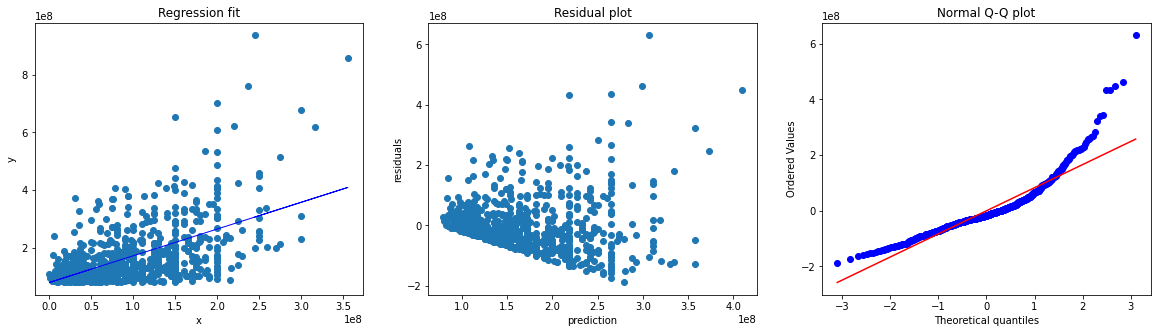

In [113]:
diagnostic_plot(x1, y1)

In [114]:
model = sm.OLS(y1,x1)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         domestic_gross   R-squared (uncentered):                   1.897
Model:                            OLS   Adj. R-squared (uncentered):              1.899
Method:                 Least Squares   F-statistic:                             -1527.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):                        1.00
Time:                        09:44:17   Log-Likelihood:                         -14334.
No. Observations:                 723   AIC:                                  2.867e+04
Df Residuals:                     722   BIC:                                  2.868e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         1.5021      0.032     47.522      0.000       1.440       1.564
==============================================================================
Omnibus:                       86.457   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.074
Skew:                           0.622   Prob(JB):                     4.91e-50
Kurtosis:                       5.448   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-115-9f06596dc521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['predict']=fit.predict(x1)
<ipython-input-115-9f06596dc521>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['resid']= y1-x1.predict


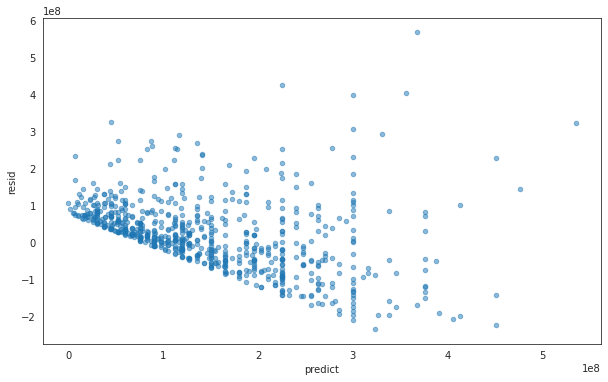

In [115]:
x1['predict']=fit.predict(x1)
x1['resid']= y1-x1.predict
with sns.axes_style('white'):
    plot = x1.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))

In [99]:
x1.head()

,budget,predict,resid
0,245000000,3.680063e+08,5.686560e+08
1,356000000,5.347356e+08,3.236374e+08
2,237000000,3.559897e+08,4.045179e+08
3,200000000,3.004133e+08,4.000133e+08
4,300000000,4.506199e+08,2.281956e+08


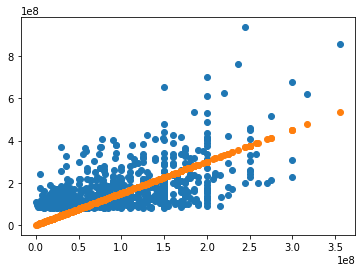

In [100]:
plt.scatter(x1.budget,y1)
plt.scatter(x1.budget,x1.predict);

In [166]:
x2 = x_train[['budget']]
y2 = y_train

In [168]:
nsample = 433
w = np.ones(nsample)

In [169]:
mod_wls = sm.WLS(y2, x2, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                                 WLS Regression Results                                
Dep. Variable:         domestic_gross   R-squared (uncentered):                   0.760
Model:                            WLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              1365.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):                   8.03e-136
Time:                        10:56:41   Log-Likelihood:                         -8576.8
No. Observations:                 433   AIC:                                  1.716e+04
Df Residuals:                     432   BIC:                                  1.716e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Is this correct model to use?
# How to plot the above to show actual + prediction?
# Where to next?

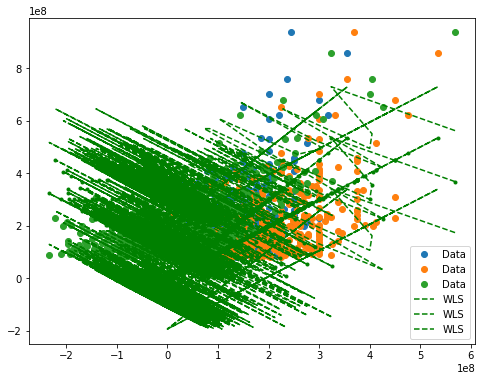

In [158]:
prstd, iv_l, iv_u = wls_prediction_std(res_wls)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x1, y1, 'o', label="Data")
#ax.plot(x1, y_train, 'b-', label="True")
# OLS
#ax.plot(x1, res_ols.fittedvalues, 'r--')
#ax.plot(x1, iv_u_ols, 'r--', label="OLS")
#ax.plot(x1, iv_l_ols, 'r--')
# WLS
ax.plot(x1, res_wls.fittedvalues, 'g--.')
ax.plot(x1, iv_u, 'g--', label="WLS")
ax.plot(x1, iv_l, 'g--')
ax.legend(loc="best");

In [147]:
x3 = df[['budget','is_sequel']]
y3 = df['domestic_gross']

In [148]:
mod_wls3 = sm.WLS(y3, x3, weights=1./(w ** 2))
res_wls3 = mod_wls3.fit()
print(res_wls3.summary())

                                 WLS Regression Results                                
Dep. Variable:         domestic_gross   R-squared (uncentered):                   0.763
Model:                            WLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              1163.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):                   2.50e-226
Time:                        10:39:50   Log-Likelihood:                         -14326.
No. Observations:                 723   AIC:                                  2.866e+04
Df Residuals:                     721   BIC:                                  2.866e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [149]:
x4 = df[['budget','year']]
y4 = df['domestic_gross']

In [150]:
mod_wls4 = sm.WLS(y4, x4, weights=1./(w ** 2))
res_wls4 = mod_wls4.fit()
print(res_wls4.summary())

                                 WLS Regression Results                                
Dep. Variable:         domestic_gross   R-squared (uncentered):                   0.804
Model:                            WLS   Adj. R-squared (uncentered):              0.803
Method:                 Least Squares   F-statistic:                              1475.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):                   1.61e-255
Time:                        10:40:07   Log-Likelihood:                         -14259.
No. Observations:                 723   AIC:                                  2.852e+04
Df Residuals:                     721   BIC:                                  2.853e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------